# Project Description: The Milwaukee Bucks Steal of Signing in Gary Trent Jr.

## Objective
This project aims to analyze and demonstrate the value of the Milwaukee Bucks signing Gary Trent Jr., emphasizing his role as a 3&D player (Three-Point Shooter and Defensive Specialist). Using statistical analysis of his performance from the 2023-24 NBA season, we compare important defensive and three-point metrics against other shooting guards in the league. Additionally, we predict his future performance to showcase his potential consistency and value for his new team.

## Methodology
1. **Data Collection**
   - Gather Gary Trent Jr.’s stats from the 2023-24 NBA season on basketball-reference.com.
   - Collect similar stats for shooting guards in the league for comparative analysis.
2. **Comparative Analysis**
   - Analyze and compare Gary Trent Jr.’s performance with his peers who play a similar amount of games to highlight his effectiveness and efficiency as a 3&D player.
3. **Statistical Predictions**
   - Develop multiple predictive models to forecast Gary Trent Jr.’s performance for the upcoming season.
   - Use these predictions to argue his consistent value and projected impact for the Milwaukee Bucks.
4. **Financial Justification**
   - Correlate the predicted performance with the typical salary range of players with similar impact.
   - Demonstrate that Gary Trent Jr. performs at a level worthy of a 10-20 million dollar player, thereby justifying the signing as a strategic advantage for the Bucks.


#### All datasets imported into this project are from basketball-reference.com

## Data Ingestion:

In [1]:
#import packages needed
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import openpyxl

In [2]:
#Load in 2023-2024 NBA Season Stats and see if it loaded in properly
nba_df = pd.read_excel('nbaPerGame.xlsx')
nba_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,achiupr01
1,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,adebaba01
2,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,agbajoc01
3,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,...,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,aldamsa01
4,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,...,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,alexani01


In [3]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 572 non-null    int64  
 1   Player             572 non-null    object 
 2   Pos                572 non-null    object 
 3   Age                572 non-null    int64  
 4   Tm                 572 non-null    object 
 5   G                  572 non-null    int64  
 6   GS                 572 non-null    int64  
 7   MP                 572 non-null    float64
 8   FG                 572 non-null    float64
 9   FGA                572 non-null    float64
 10  FG%                568 non-null    float64
 11  3P                 572 non-null    float64
 12  3PA                572 non-null    float64
 13  3P%                540 non-null    float64
 14  2P                 572 non-null    float64
 15  2PA                572 non-null    float64
 16  2P%                567 non

In [4]:
#Drop "Rk" and "Player-additional columns, will not be used" 
cols_to_drop = [nba_df.columns[i] for i in [0, 30]]
nba_df = nba_df.drop(cols_to_drop, axis=1)

In [5]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  572 non-null    object 
 1   Pos     572 non-null    object 
 2   Age     572 non-null    int64  
 3   Tm      572 non-null    object 
 4   G       572 non-null    int64  
 5   GS      572 non-null    int64  
 6   MP      572 non-null    float64
 7   FG      572 non-null    float64
 8   FGA     572 non-null    float64
 9   FG%     568 non-null    float64
 10  3P      572 non-null    float64
 11  3PA     572 non-null    float64
 12  3P%     540 non-null    float64
 13  2P      572 non-null    float64
 14  2PA     572 non-null    float64
 15  2P%     567 non-null    float64
 16  eFG%    568 non-null    float64
 17  FT      572 non-null    float64
 18  FTA     572 non-null    float64
 19  FT%     537 non-null    float64
 20  ORB     572 non-null    float64
 21  DRB     572 non-null    float64
 22  TR

In [6]:
#add to SQLite3 database
conn = sqlite3.connect('nba_database.db')
nba_df.to_sql('nba_stats', conn, if_exists='replace')

572

In [7]:
#Load 23-24 Advanced Stats 
adv_df = pd.read_excel('nbaAdvanced.xlsx')
adv_df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,0.545,0.207,...,1.2,2.2,3.4,0.102,NaN,-1.7,0.3,-1.4,0.2,achiupr01
1,2,Bam Adebayo,C,26,MIA,71,2416,19.8,0.576,0.041,...,2.9,4.3,7.2,0.144,NaN,0.8,1.7,2.4,2.7,adebaba01
2,3,Ochai Agbaji,SG,23,TOT,78,1641,7.7,0.497,0.487,...,-0.5,0.6,0.1,0.002,NaN,-3.5,-0.9,-4.4,-1.0,agbajoc01
3,4,Santi Aldama,PF,23,MEM,61,1618,13.1,0.539,0.535,...,0.4,2.0,2.4,0.070,NaN,-0.7,0.4,-0.2,0.7,aldamsa01
4,5,Nickeil Alexander-Walker,SG,25,MIN,82,1921,10.9,0.578,0.623,...,1.5,2.8,4.3,0.107,NaN,-1.1,1.3,0.2,1.1,alexani01


In [8]:
#Dividing MP (Total Minutes Played and Games Played) to get avg Minutes played like the MP column in nba_df
adv_df['MP'] = adv_df['MP'] / adv_df['G']
adv_df.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Player-additional
0,1,Precious Achiuwa,PF-C,24,TOT,74,21.945946,14.6,0.545,0.207,...,1.2,2.2,3.4,0.102,NaN,-1.7,0.3,-1.4,0.2,achiupr01
1,2,Bam Adebayo,C,26,MIA,71,34.028169,19.8,0.576,0.041,...,2.9,4.3,7.2,0.144,NaN,0.8,1.7,2.4,2.7,adebaba01
2,3,Ochai Agbaji,SG,23,TOT,78,21.038462,7.7,0.497,0.487,...,-0.5,0.6,0.1,0.002,NaN,-3.5,-0.9,-4.4,-1.0,agbajoc01
3,4,Santi Aldama,PF,23,MEM,61,26.524590,13.1,0.539,0.535,...,0.4,2.0,2.4,0.070,NaN,-0.7,0.4,-0.2,0.7,aldamsa01
4,5,Nickeil Alexander-Walker,SG,25,MIN,82,23.426829,10.9,0.578,0.623,...,1.5,2.8,4.3,0.107,NaN,-1.1,1.3,0.2,1.1,alexani01


In [9]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rk                 572 non-null    int64  
 1   Player             572 non-null    object 
 2   Pos                572 non-null    object 
 3   Age                572 non-null    int64  
 4   Tm                 572 non-null    object 
 5   G                  572 non-null    int64  
 6   MP                 572 non-null    float64
 7   PER                572 non-null    float64
 8   TS%                568 non-null    float64
 9   3PAr               568 non-null    float64
 10  FTr                568 non-null    float64
 11  ORB%               572 non-null    float64
 12  DRB%               572 non-null    float64
 13  TRB%               572 non-null    float64
 14  AST%               572 non-null    float64
 15  STL%               572 non-null    float64
 16  BLK%               572 non

In [10]:
#Dropping the "Rk", "Player-additional", and empty columns
cols_to_drop_2 = [adv_df.columns[i] for i in [0, 19, 24, 29]]
adv_df = adv_df.drop(cols_to_drop_2, axis=1)

In [11]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  572 non-null    object 
 1   Pos     572 non-null    object 
 2   Age     572 non-null    int64  
 3   Tm      572 non-null    object 
 4   G       572 non-null    int64  
 5   MP      572 non-null    float64
 6   PER     572 non-null    float64
 7   TS%     568 non-null    float64
 8   3PAr    568 non-null    float64
 9   FTr     568 non-null    float64
 10  ORB%    572 non-null    float64
 11  DRB%    572 non-null    float64
 12  TRB%    572 non-null    float64
 13  AST%    572 non-null    float64
 14  STL%    572 non-null    float64
 15  BLK%    572 non-null    float64
 16  TOV%    568 non-null    float64
 17  USG%    572 non-null    float64
 18  OWS     572 non-null    float64
 19  DWS     572 non-null    float64
 20  WS      572 non-null    float64
 21  WS/48   572 non-null    float64
 22  OB

In [12]:
#Add advanced stats to SQL database
conn = sqlite3.connect('nba_database.db')
adv_df.to_sql('adv_stats', conn, if_exists='replace')

572

In [13]:
#checking for null values 
nba_df.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        4
3P         0
3PA        0
3P%       32
2P         0
2PA        0
2P%        5
eFG%       4
FT         0
FTA        0
FT%       35
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [14]:
#The player's below dont have a FT% or 3P% due to their lack of games/minutes played. 4 players do not have FG% as well. 
#Players must meet a threshold for stats to count at the end of the season, those players did not. Therefore, these stats can stay for now as NAN.
null_values = nba_df[nba_df['FT%'].isnull() | nba_df['3P%'].isnull()]
null_values

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14,Ryan Arcidiacono,PG,29,NYK,20,0,2.3,0.0,0.3,0.000,...,NaN,0.0,0.4,0.4,0.2,0.1,0.0,0.1,0.3,0.0
17,Udoka Azubuike,C,24,PHO,16,0,7.1,1.0,1.4,0.696,...,0.231,0.7,1.3,2.0,0.2,0.1,0.4,0.3,1.1,2.2
18,Ibou Badji,C,21,POR,22,1,10.3,0.6,1.0,0.636,...,0.500,0.9,1.4,2.3,0.6,0.1,0.9,0.7,2.1,1.5
45,Bismack Biyombo,C,31,TOT,40,27,19.8,1.9,3.3,0.565,...,0.481,1.6,3.7,5.2,1.3,0.3,0.9,1.1,2.2,4.4
57,Jamaree Bouyea,PG,24,TOT,9,0,10.6,1.1,3.1,0.357,...,NaN,0.3,1.8,2.1,1.2,0.1,0.0,1.0,1.1,2.3
63,Izaiah Brockington,PG,24,NOP,1,0,3.0,2.0,5.0,0.400,...,NaN,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0
68,Charlie Brown Jr.,SG,26,NYK,8,0,4.6,0.3,1.3,0.200,...,NaN,0.1,0.1,0.3,0.0,0.0,0.3,0.3,0.6,0.8
73,Moses Brown,C,24,POR,22,5,9.1,1.5,3.0,0.508,...,0.290,1.7,2.2,3.9,0.3,0.2,0.3,0.5,1.2,3.4
90,Colin Castleton,C,23,LAL,16,0,3.7,0.6,1.0,0.563,...,1.000,0.4,0.4,0.8,0.2,0.1,0.0,0.2,0.7,1.5
91,Malcolm Cazalon,SG,22,DET,1,0,3.0,0.0,0.0,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#NAN stats can stay due to similar reasoning from the other dataset
adv_df.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
TS%       4
3PAr      4
FTr       4
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      4
USG%      0
OWS       0
DWS       0
WS        0
WS/48     0
OBPM      0
DBPM      0
BPM       0
VORP      0
dtype: int64

In [16]:
nba_df.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,572.000000,572.000000,572.000000,572.000000,572.00000,572.000000,568.000000,572.000000,572.000000,540.000000,...,537.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,25.743007,46.153846,21.503497,18.650699,3.12028,6.683392,0.452750,0.940909,2.646329,0.317228,...,0.747110,0.857692,2.522902,3.373077,2.001399,0.591259,0.402797,0.984615,1.490909,8.423252
std,4.225107,25.535953,26.906890,9.906921,2.45884,4.991255,0.107259,0.879363,2.241818,0.134252,...,0.157051,0.746194,1.831697,2.425364,1.873410,0.390106,0.413213,0.795813,0.787215,6.791411
min,19.000000,1.000000,0.000000,0.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,22.000000,0.000000,10.800000,1.30000,3.000000,0.409750,0.200000,0.900000,0.286000,...,0.686000,0.300000,1.200000,1.600000,0.700000,0.300000,0.100000,0.400000,1.000000,3.400000
50%,25.000000,51.000000,7.000000,17.350000,2.40000,5.100000,0.452500,0.700000,2.100000,0.348000,...,0.772000,0.700000,2.200000,3.000000,1.300000,0.550000,0.300000,0.700000,1.500000,6.400000
75%,28.000000,69.000000,41.250000,27.000000,4.50000,9.100000,0.500000,1.500000,3.825000,0.385250,...,0.833000,1.100000,3.400000,4.400000,2.725000,0.825000,0.600000,1.400000,2.100000,11.700000
max,39.000000,84.000000,82.000000,37.800000,11.50000,23.600000,0.747000,4.800000,11.800000,1.000000,...,1.000000,4.600000,10.100000,13.700000,10.900000,2.100000,3.600000,4.400000,3.600000,34.700000


In [17]:
adv_df.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,572.000000,572.000000,572.000000,572.000000,568.000000,568.000000,568.000000,572.000000,572.000000,572.000000,...,568.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.00000,572.000000
mean,25.743007,46.153846,18.649862,12.856993,0.548931,0.402660,0.233900,5.487937,14.633916,10.045455,...,11.904401,18.154021,1.152797,1.054371,2.208392,0.075675,-1.564161,-0.178846,-1.74493,0.524301
std,4.225107,25.535953,9.910132,6.379743,0.104531,0.221009,0.180852,5.133016,6.797270,5.038805,...,5.284699,6.291339,1.803016,1.050226,2.656750,0.096767,3.912734,2.034533,5.21298,1.273750
min,19.000000,1.000000,0.500000,-19.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.500000,0.000000,-1.700000,-0.585000,-18.600000,-10.100000,-28.80000,-1.700000
25%,23.000000,22.000000,10.775937,9.600000,0.517750,0.273000,0.129000,2.275000,10.400000,6.500000,...,9.100000,13.900000,0.000000,0.200000,0.200000,0.040000,-3.100000,-1.000000,-3.60000,-0.100000
50%,25.000000,51.000000,17.373016,12.800000,0.565500,0.413000,0.207500,4.000000,13.400000,8.900000,...,11.400000,17.100000,0.450000,0.800000,1.300000,0.083000,-1.500000,-0.200000,-1.50000,0.000000
75%,28.000000,69.000000,27.037836,16.100000,0.602250,0.551000,0.310000,7.425000,18.325000,12.700000,...,14.100000,21.700000,1.700000,1.600000,3.500000,0.126250,0.425000,0.800000,0.80000,0.800000
max,39.000000,84.000000,37.835443,55.500000,0.917000,1.000000,2.000000,53.900000,41.200000,37.100000,...,57.100000,72.500000,12.000000,5.800000,17.000000,0.665000,29.100000,16.000000,43.30000,10.600000


# Visualizing the datasets
Below we will start by showing the distribution of numerical columns 

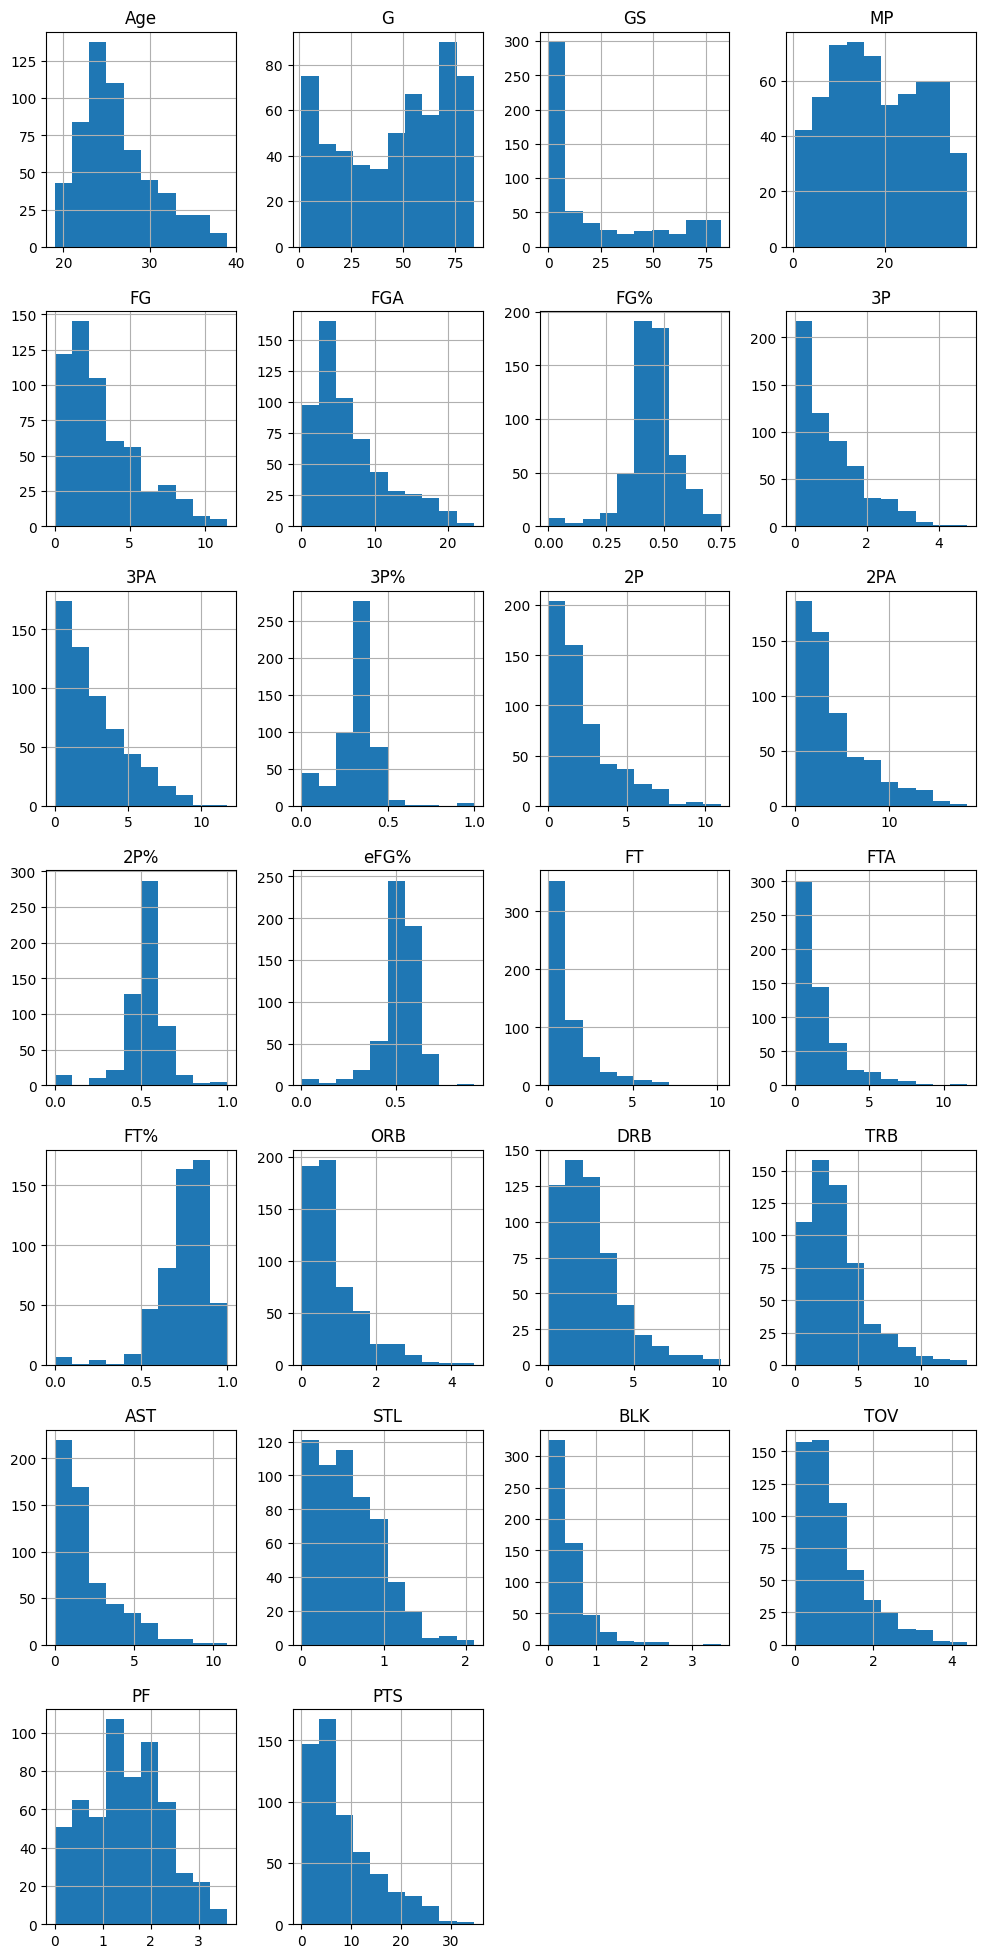

In [18]:
#Showing distribution of numerical columns 
columns = list(nba_df)[:29]

nba_df[columns].hist(figsize=(12,50),layout=(14,4))

plt.show()

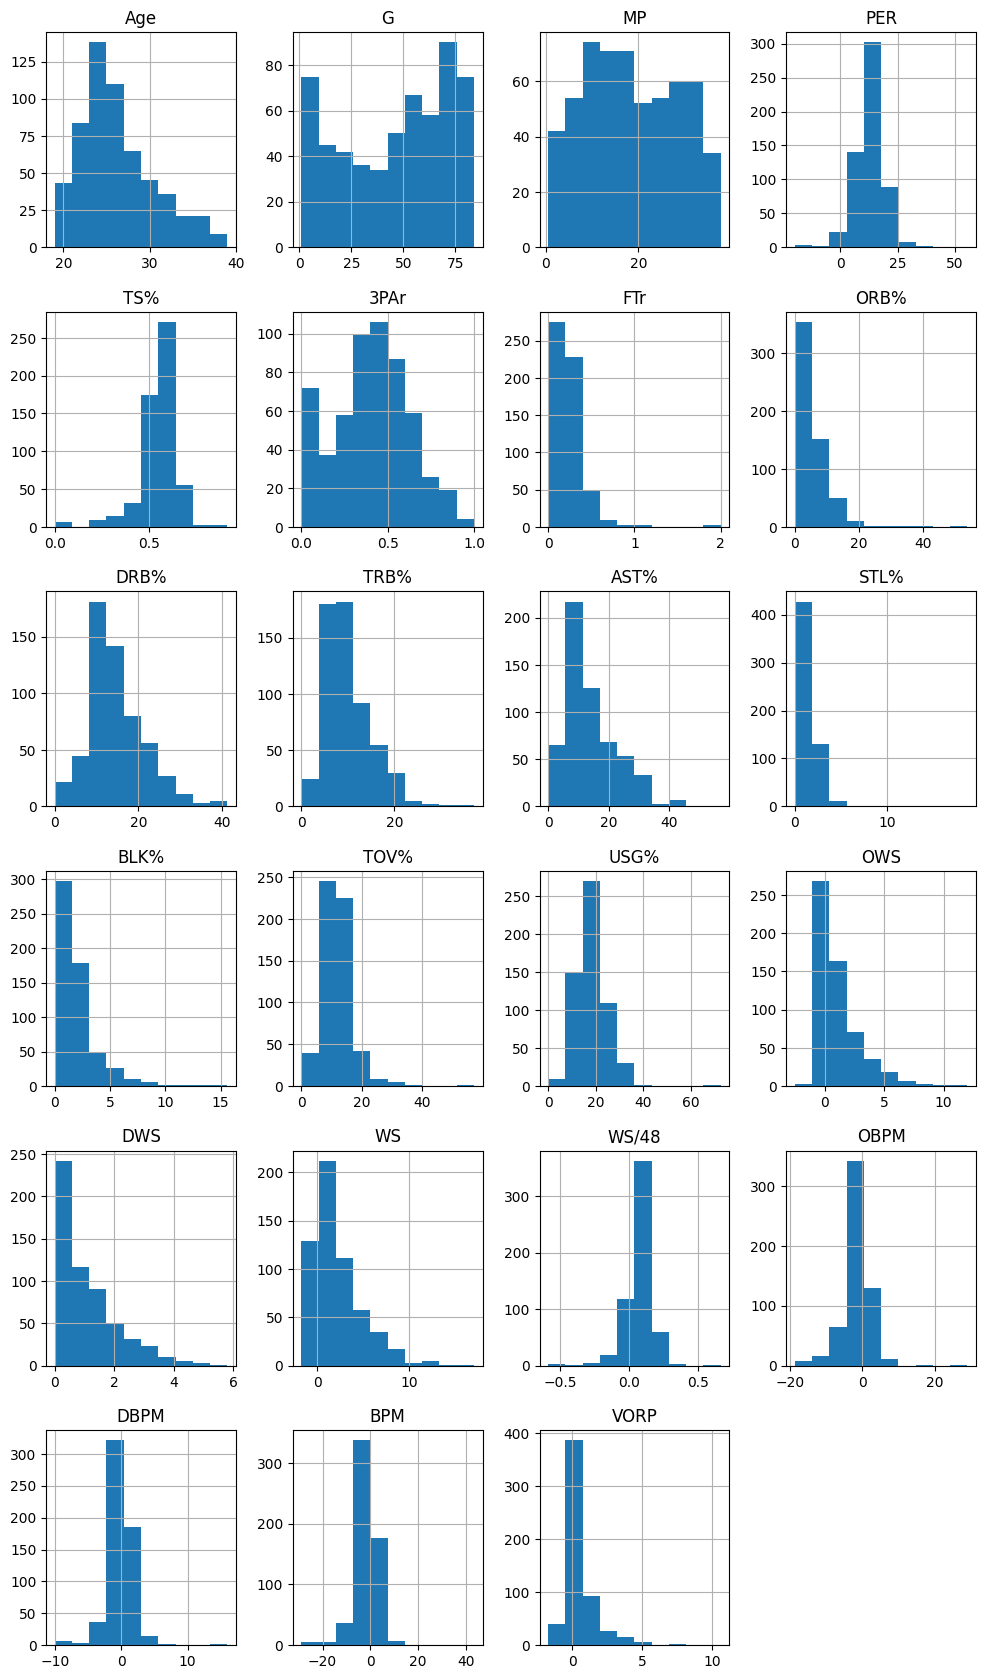

In [19]:
#Showing ditribution of numerical columns
adv_columns = list(adv_df)[:29]

adv_df[adv_columns].hist(figsize=(12,50),layout=(14,4))

plt.show()

Here, we are visualizing the percentage of shooting guards who shoot threes. This will help us determine Gary's ranking among his peers.

I am retrieving data for shooting guards (SG) from the database who have played more than 25 games and averaged at least 15 minutes per game so that players who play a prominent role for their respective teams show up.

Then plotting a pie chart showing the frequency distribution of players within each three-point shooting percentage bin

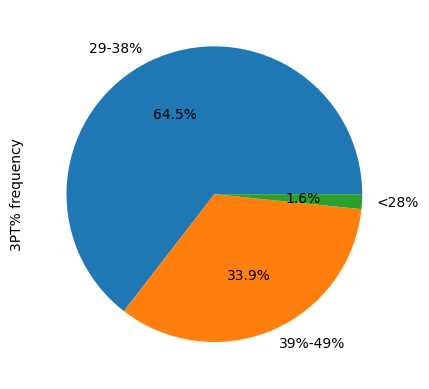

In [26]:
bins = [0, 0.28, 0.39, 0.49] 
labels = ['<28%', '29-38%', '39%-49%']

ThreePtSG = pd.read_sql_query("SELECT Player, \"3P%\" FROM nba_stats WHERE Pos = 'SG' and G > 25 and MP >= 15", conn)
ThreePtSG['3P% Binned'] = pd.cut(ThreePtSG['3P%'], bins=bins, labels=labels)

ThreePtSG['3P% Binned'].value_counts().plot(kind='pie',ylabel='3PT% frequency',autopct='%1.1f%%')

plt.show()

In [248]:
#Using same SQL query to show top 25 3Pt SG's, Gary is 21st on this list.
gary_3df = pd.read_sql_query("SELECT Player, \"3P%\" FROM nba_stats WHERE Pos = 'SG' and G > 25 and MP >= 15", conn)
top_25_3 = gary_3df.sort_values('3P%', ascending=False).head(25)
top_25_3

,Player,3P%
61,Aaron Wiggins,0.492
2,Grayson Allen,0.461
32,Luke Kennard,0.450
35,Garrison Mathews,0.440
46,Norman Powell,0.435
6,Bradley Beal,0.430
59,Cason Wallace,0.419
18,Keon Ellis,0.417
31,Isaiah Joe,0.416
7,Malik Beasley,0.413


In [249]:
#Here we are using a similar query but for the steals (STL) column, Gary is 14th on this list
stl_df = pd.read_sql_query("SELECT Player, STL FROM nba_stats WHERE Pos = 'SG' and G > 25 and MP >= 15", conn)
top_25_3 = stl_df.sort_values("STL", ascending=False).head(25)
top_25_3

,Player,STL
38,Donovan Mitchell,1.8
12,Alex Caruso,1.7
36,De'Anthony Melton,1.6
54,Jalen Suggs,1.4
41,Dejounte Murray,1.4
15,Donte DiVincenzo,1.3
29,Kyrie Irving,1.3
4,Scottie Barnes,1.3
17,Anthony Edwards,1.3
11,Kentavious Caldwell-Pope,1.3


With Gary being in the top 34% of shooting guards for 3PT percentange and top 15 in steals per game, I used a scatter plot visualize that impact on both sides off the floor and show how it compares to other shooting guards

In [250]:
#Here we will merge the two queries into one dataset for visualization 
merged_df = pd.merge(gary_3df, stl_df, on='Player', how='inner')

In [251]:
players = merged_df['Player']
three_point = merged_df['3P%']
steals = merged_df['STL']

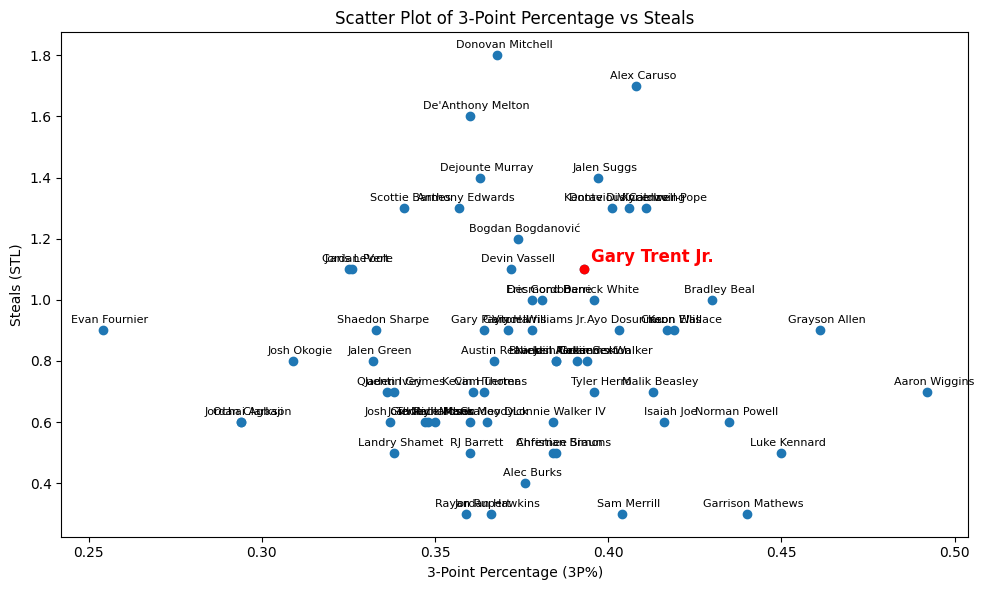

In [252]:
#creating scatter plot to visualize the best 3&D SG's in the NBA
plt.figure(figsize=(10, 6))
plt.scatter(three_point, steals)

for i, player in enumerate(players):
    if player == 'Gary Trent Jr.':
        plt.scatter(three_point[i], steals[i], color='red')  # Highlighting the point in red
        plt.annotate(player, (three_point[i], steals[i]), textcoords="offset points", xytext=(5,5), ha='left', color='red', fontsize=12, fontweight='bold', zorder=5)
    else:
        plt.annotate(player, (three_point[i], steals[i]), textcoords="offset points", xytext=(5,5), ha='center',fontsize=8, zorder=4)

# Adding labels and title
plt.xlabel('3-Point Percentage (3P%)')
plt.ylabel('Steals (STL)')
plt.title('Scatter Plot of 3-Point Percentage vs Steals')

plt.tight_layout()

# Displaying the plot
plt.show()

### Analysis: Gary Trent Jr.'s Value vs. Salary

Gary Trent Jr. has consistently demonstrated his prowess as a 3&D player, His stats from the 2023-24 NBA season, particularly in steals and three-point percentage, position him as a key player comparable to the likes of Devin Vassell, Bradley Beal, Derrick White, Bogdan Bogdanovic, and Jordan Poole.

| Player             | Salary (2024-25)       |
|--------------------|------------------------|
| Devin Vassell      | $29,347,826            |
| Bradley Beal       | $50,203,930            |
| Derrick White      | $18,821,429            |
| Bogdan Bogdanovic  | $18,000,000            |
| Jordan Poole       | $26,000,000            

However, despite his comparable performance metrics, Gary Trent Jr. does not command the same salary as these players. This discrepancy highlights a potential undervaluation in the market for his specific skill set. By predicting his stats for the upcoming season, it becomes evident that Trent Jr. can consistently deliver high-level performance, making him a valuable asset for any team.


## Predicting Future Performance for Gary Trent Jr.

In this section, I will conduct further visualization research using correlation analysis to predict Gary Trent Jr.'s stats for the upcoming season. The specific stats I will be predicting are:

- Points
- Defensive Win Shares (due to correlation being better than steals)
- Three-Point Made
- Three-Point Attempted

By leveraging these predictions, we can gain insights into Gary Trent Jr.'s potential impact and consistent value for his new team.


In [254]:
adv_df_numerical = adv_df.select_dtypes(include=[np.number])
adv_df_numerical.corr()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Age,1.000000,0.172119,0.163291,0.077523,0.072993,0.057773,-0.059609,-0.074128,0.019196,-0.021480,...,-0.013525,-0.057673,0.239816,0.168406,0.229383,0.141579,0.131506,0.101543,0.138194,0.196739
G,0.172119,1.000000,0.701534,0.341546,0.411550,0.018620,0.009173,-0.109923,0.098756,0.015873,...,-0.026243,0.164784,0.556932,0.748895,0.673790,0.349096,0.421438,0.134180,0.369185,0.409042
MP,0.163291,0.701534,1.000000,0.429045,0.349597,-0.027546,0.031199,-0.161475,0.111101,-0.007362,...,-0.028155,0.350743,0.634945,0.748601,0.726961,0.323854,0.500192,0.118162,0.422005,0.567286
PER,0.077523,0.341546,0.429045,1.000000,0.699546,-0.354526,0.418327,0.456528,0.431658,0.528745,...,-0.117647,0.426910,0.558625,0.465675,0.563788,0.865480,0.894639,0.545131,0.884759,0.560831
TS%,0.072993,0.411550,0.349597,0.699546,1.000000,-0.143373,0.238171,0.145057,0.263334,0.256025,...,0.016905,0.028688,0.412930,0.353934,0.420951,0.781756,0.684832,0.394462,0.666742,0.303971
3PAr,0.057773,0.018620,-0.027546,-0.354526,-0.143373,1.000000,-0.448007,-0.552341,-0.432816,-0.574641,...,-0.218332,-0.116759,-0.171942,-0.136806,-0.170319,-0.227127,-0.076811,-0.164711,-0.121676,-0.138667
FTr,-0.059609,0.009173,0.031199,0.418327,0.238171,-0.448007,1.000000,0.382579,0.282817,0.390334,...,-0.009762,0.069423,0.183407,0.109824,0.168098,0.404437,0.306109,0.281533,0.338799,0.156589
ORB%,-0.074128,-0.109923,-0.161475,0.456528,0.145057,-0.552341,0.382579,1.000000,0.414482,0.791197,...,0.110500,0.054284,0.030391,0.006603,0.024168,0.350384,0.224724,0.269050,0.273836,0.000524
DRB%,0.019196,0.098756,0.111101,0.431658,0.263334,-0.432816,0.282817,0.414482,1.000000,0.883773,...,0.074031,0.134884,0.214481,0.280698,0.255815,0.349240,0.196613,0.258417,0.248574,0.247604
TRB%,-0.021480,0.015873,-0.007362,0.528745,0.256025,-0.574641,0.390334,0.791197,0.883773,1.000000,...,0.105140,0.119291,0.167741,0.200746,0.193179,0.421235,0.252902,0.317022,0.313733,0.175050


In [253]:
nba_df_numerical = nba_df.select_dtypes(include=[np.number])
nba_df_numerical.corr()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.172119,0.127585,0.163461,0.112252,0.105448,0.033482,0.154332,0.127487,0.079960,...,0.126301,0.003211,0.114610,0.087253,0.182891,0.130814,0.021177,0.078148,0.081595,0.118467
G,0.172119,1.000000,0.654769,0.701449,0.597207,0.581135,0.321058,0.524597,0.504219,0.278738,...,0.216359,0.315720,0.545678,0.508848,0.466454,0.485232,0.344270,0.497662,0.591014,0.591923
GS,0.127585,0.654769,1.000000,0.840699,0.810977,0.791853,0.243085,0.601694,0.595128,0.180932,...,0.210359,0.392134,0.707316,0.654688,0.649316,0.605790,0.470942,0.711640,0.634514,0.804270
MP,0.163461,0.701449,0.840699,1.000000,0.895527,0.899503,0.264346,0.724468,0.731560,0.267368,...,0.258176,0.426787,0.778393,0.718441,0.748452,0.768405,0.461688,0.815347,0.780160,0.892276
FG,0.112252,0.597207,0.810977,0.895527,1.000000,0.980548,0.310587,0.694597,0.697686,0.226947,...,0.248062,0.393451,0.774887,0.706099,0.771042,0.680219,0.435917,0.875093,0.661386,0.992609
FGA,0.105448,0.581135,0.791853,0.899503,0.980548,1.000000,0.176533,0.774601,0.793075,0.237914,...,0.275772,0.287535,0.707052,0.622109,0.789762,0.686440,0.352977,0.878519,0.630711,0.986231
FG%,0.033482,0.321058,0.243085,0.264346,0.310587,0.176533,1.000000,-0.017930,-0.084210,0.129048,...,-0.046763,0.480345,0.407054,0.455673,0.126229,0.172828,0.410858,0.219267,0.378558,0.265772
3P,0.154332,0.524597,0.601694,0.724468,0.694597,0.774601,-0.017930,1.000000,0.984518,0.441274,...,0.372582,-0.104597,0.358111,0.237573,0.605427,0.540817,0.083210,0.593307,0.416933,0.741747
3PA,0.127487,0.504219,0.595128,0.731560,0.697686,0.793075,-0.084210,0.984518,1.000000,0.363694,...,0.361554,-0.109653,0.359695,0.237139,0.616837,0.548218,0.072400,0.614691,0.421269,0.744988
3P%,0.079960,0.278738,0.180932,0.267368,0.226947,0.237914,0.129048,0.441274,0.363694,1.000000,...,0.236341,-0.116714,0.078031,0.024719,0.220475,0.228132,-0.000598,0.151740,0.134455,0.251424


In [255]:
#Lets replace the null values with zero in this case it will be okay, because 0 will be representing a record with no or ineligible data.
#ineliglible data means a player could not reach the minimum requirement for that stat in the 2023-2024 season.
nba_df['FG'].fillna(0, inplace=True)
nba_df['3P'].fillna(0, inplace=True)
nba_df['MP'].fillna(0, inplace=True)
nba_df['PTS'].fillna(0, inplace=True)

C:\Users\sloan\AppData\Local\Temp\ipykernel_10828\2814346199.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba_df['FG'].fillna(0, inplace=True)
C:\Users\sloan\AppData\Local\Temp\ipykernel_10828\2814346199.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

Here I am showing the linear relationship of the predictor variables and target variable.

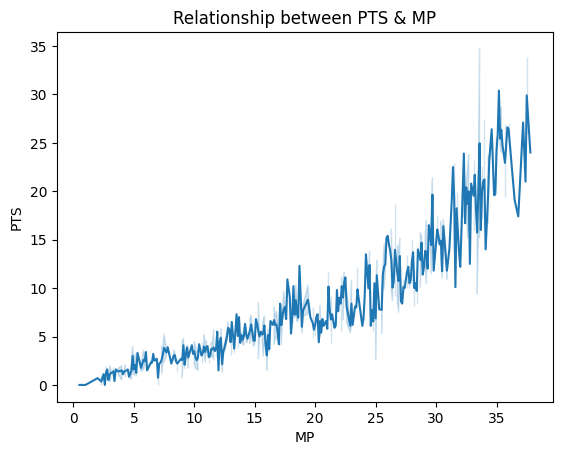

In [256]:
#create a lineplot

sns.lineplot(data=nba_df, x='MP', y='PTS')

# Add labels and title
plt.xlabel('MP')
plt.ylabel('PTS')
plt.title('Relationship between PTS & MP')

# Show the plot
plt.show()

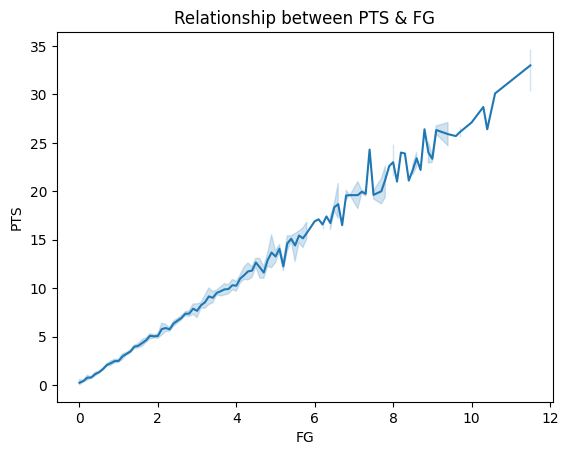

In [257]:

#create a lineplot

sns.lineplot(data=nba_df, x='FG', y='PTS')

# Add labels and title
plt.xlabel('FG')
plt.ylabel('PTS')
plt.title('Relationship between PTS & FG')

# Show the plot
plt.show()

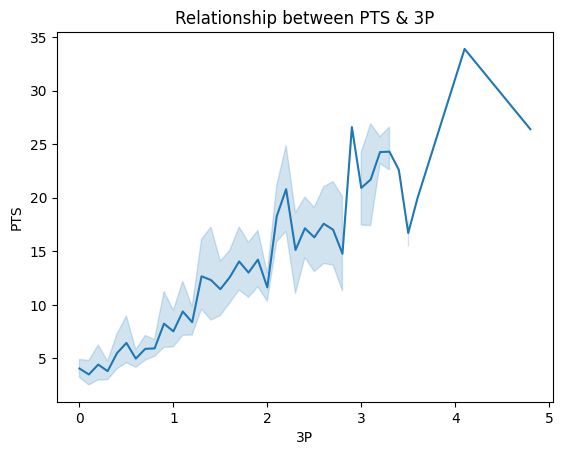

In [258]:
#create a lineplot

sns.lineplot(data=nba_df, x='3P', y='PTS')

# Add labels and title
plt.xlabel('3P')
plt.ylabel('PTS')
plt.title('Relationship between PTS & 3P')

# Show the plot
plt.show()

Here we are splitting X and Y!

In [259]:
X = nba_df[['MP', 'FG', '3P']]
X

,MP,FG,3P
0,21.9,3.2,0.4
1,34.0,7.5,0.2
2,21.0,2.3,0.8
3,26.5,4.0,1.7
4,23.4,2.9,1.6
...,...,...,...
567,13.3,2.0,0.0
568,36.0,8.0,3.2
569,11.4,2.1,0.1
570,7.4,0.6,0.0


In [260]:
y = nba_df['PTS']
y

0       7.6
1      19.3
2       5.8
3      10.7
4       8.0
       ... 
567     4.2
568    25.7
569     4.6
570     1.8
571    11.7
Name: PTS, Length: 572, dtype: float64

# **Data Model for Points Per Game (Linear Regression)**

In [261]:
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [262]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X)

In [263]:
# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Display the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 0.4224952016009615
R-squared: 0.9908238243669945
Coefficients: [-0.03043135  2.64037543  0.84284742]
Intercept: -0.04128350197659891


The r-squared shows how well the data fit the regression model, a good r-squared value is between 0.50 to 0.99! The model is outputting 0.99, which is the most efficient we can get!|

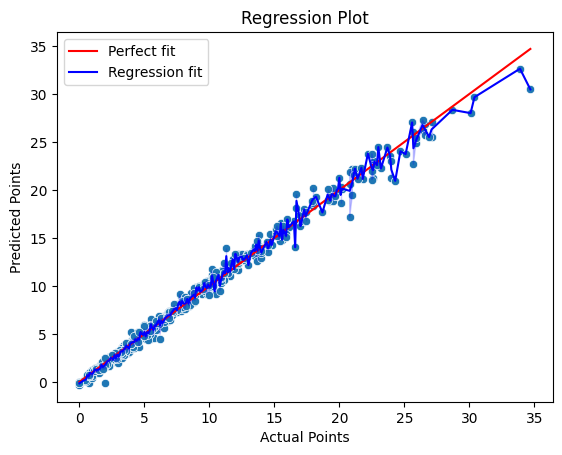

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=y, y=y_pred)

# Add the regression line
sns.lineplot(x=y, y=y, color='red', label='Perfect fit')
sns.lineplot(x=y, y=y_pred, color='blue', label='Regression fit')

plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Regression Plot")
plt.legend()
plt.show()

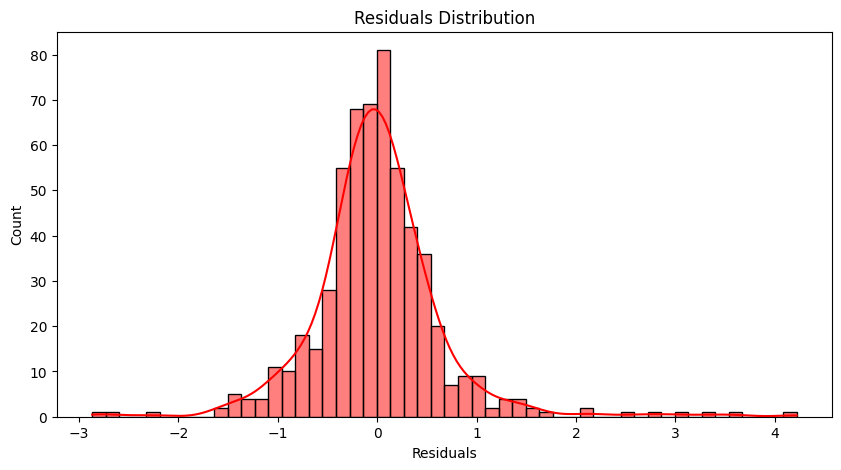

In [265]:
residuals = y - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, color='red')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

In [266]:
predictions = y_pred

# Adding the predictions to the DataFrame
nba_df['Predicted PTS'] = predictions
#Rounding Values to a decimal points
nba_df['Predicted PTS'] = round(nba_df['Predicted PTS'],ndigits=1)
# Displaying the updated DataFrame
nba_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Predicted PTS
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6,8.1
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3,18.9
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8,6.1
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7,11.1
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,13.3,2.0,3.3,0.602,...,1.4,1.7,3.1,1.7,0.7,0.2,0.5,1.5,4.2,4.8
568,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,0.430,...,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7,22.7
569,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,0.538,...,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6,5.2
570,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,0.419,...,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8,1.3


Perfect! Now that we have the predicted values in the dataset, it is time to adjust Gary's minutes to reflect the potential role he will play for Milwaukee. In Toronto he played 28.1 minutes per game because he was one of the team's better players and played with no All-Star teammates. In Milwaukee, he will be playing with 2 superstars in Giannis Antetokoumpo and Damian Lillard, so his minutes will drop down slightly. Below we will adjust his minutes to 24 and predict his stats again. 

In [267]:
gt = nba_df.loc[nba_df['Player'] == 'Gary Trent Jr.']

In [268]:
total_points = 974
total_minutes = gt['MP'].values[0] * 82 

ppm = total_points / total_minutes

# New expected minutes per game
new_minutes_per_game = 24

# Estimate new Points Per Game (PPG)
new_ppg = ppm * new_minutes_per_game

print(f"Estimated Points Per Game: {new_ppg:.1f}")


Estimated Points Per Game: 10.1


In [269]:
new_ppg = new_ppg.round(1)

In [270]:
nba_df.loc[nba_df['Player'] == 'Gary Trent Jr.', 'Predicted PTS'] = new_ppg

In [271]:
adjustedGT = nba_df.loc[nba_df['Player'] == 'Gary Trent Jr.']
adjustedGT

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Predicted PTS
506,Gary Trent Jr.,SG,25,TOR,71,41,28.1,5.1,11.9,0.426,...,0.4,2.3,2.6,1.7,1.1,0.1,0.7,1.4,13.7,10.1


Now that we have predicted his PPG (points per game) it is time to initiate a couple more models to find his three-point stats and Defensive Win Shares. I switched from predicting steals to Defensive Win Shares due to the column STL having a lack of correlation with other columns in the dataset. Also, the stat defensive win shares is a measure of how many wins a player contributes to their team through their defensive play and this is perfect to show the impact Gary can have for Milwaukee defensively.

# **Data Models for 3PT Percentage (Linear Regression)**

In [272]:
total_df = pd.merge(nba_df, adv_df, on='Player', how='inner')
total_df

,Player,Pos_x,Age_x,Tm_x,G_x,GS,MP_x,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,13.8,15.9,1.2,2.2,3.4,0.102,-1.7,0.3,-1.4,0.2
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,12.0,24.9,2.9,4.3,7.2,0.144,0.8,1.7,2.4,2.7
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,12.3,13.4,-0.5,0.6,0.1,0.002,-3.5,-0.9,-4.4,-1.0
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,10.2,17.9,0.4,2.0,2.4,0.070,-0.7,0.4,-0.2,0.7
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,11.8,14.8,1.5,2.8,4.3,0.107,-1.1,1.3,0.2,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,13.3,2.0,3.3,0.602,...,11.6,12.6,0.9,0.4,1.3,0.138,-0.5,0.8,0.3,0.2
568,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,0.430,...,16.5,30.5,4.0,0.6,4.6,0.114,4.9,-2.3,2.6,2.2
569,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,0.538,...,15.9,17.9,0.3,0.4,0.7,0.062,-1.6,-1.5,-3.0,-0.1
570,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,0.419,...,16.9,12.9,0.4,0.4,0.8,0.124,-2.9,0.3,-2.6,0.0


In [273]:
total_df_numerical = total_df.select_dtypes(include=[np.number])
total_df_numerical.corr()

,Age_x,G_x,GS,MP_x,FG,FGA,FG%,3P,3PA,3P%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Age_x,1.000000,0.172119,0.127585,0.163461,0.112252,0.105448,0.033482,0.154332,0.127487,0.079960,...,-0.013525,-0.057673,0.239816,0.168406,0.229383,0.141579,0.131506,0.101543,0.138194,0.196739
G_x,0.172119,1.000000,0.654769,0.701449,0.597207,0.581135,0.321058,0.524597,0.504219,0.278738,...,-0.026243,0.164784,0.556932,0.748895,0.673790,0.349096,0.421438,0.134180,0.369185,0.409042
GS,0.127585,0.654769,1.000000,0.840699,0.810977,0.791853,0.243085,0.601694,0.595128,0.180932,...,-0.027681,0.358196,0.689666,0.771419,0.773423,0.294283,0.445966,0.096356,0.372978,0.630455
MP_x,0.163461,0.701449,0.840699,1.000000,0.895527,0.899503,0.264346,0.724468,0.731560,0.267368,...,-0.028130,0.350851,0.634909,0.748447,0.726878,0.323846,0.500208,0.118133,0.422003,0.567260
FG,0.112252,0.597207,0.810977,0.895527,1.000000,0.980548,0.310587,0.694597,0.697686,0.226947,...,-0.067627,0.615816,0.711028,0.715774,0.765710,0.358159,0.594507,0.074394,0.475611,0.719174
FGA,0.105448,0.581135,0.791853,0.899503,0.980548,1.000000,0.176533,0.774601,0.793075,0.237914,...,-0.093401,0.639487,0.628344,0.667439,0.690506,0.262864,0.542668,0.011374,0.412087,0.654932
FG%,0.033482,0.321058,0.243085,0.264346,0.310587,0.176533,1.000000,-0.017930,-0.084210,0.129048,...,0.167110,0.020553,0.378557,0.326161,0.386116,0.642970,0.476761,0.312200,0.478955,0.271513
3P,0.154332,0.524597,0.601694,0.724468,0.694597,0.774601,-0.017930,1.000000,0.984518,0.441274,...,-0.180830,0.409573,0.419104,0.451548,0.463804,0.174630,0.464226,-0.040619,0.333136,0.431479
3PA,0.127487,0.504219,0.595128,0.731560,0.697686,0.793075,-0.084210,0.984518,1.000000,0.363694,...,-0.182823,0.446412,0.374580,0.435459,0.427211,0.099242,0.406956,-0.086140,0.272336,0.400341
3P%,0.079960,0.278738,0.180932,0.267368,0.226947,0.237914,0.129048,0.441274,0.363694,1.000000,...,-0.208984,0.023402,0.172951,0.171848,0.186013,0.359126,0.473682,0.185312,0.435980,0.157917


Here I create a heat map to show where the best correlations lie in our merged dataset!

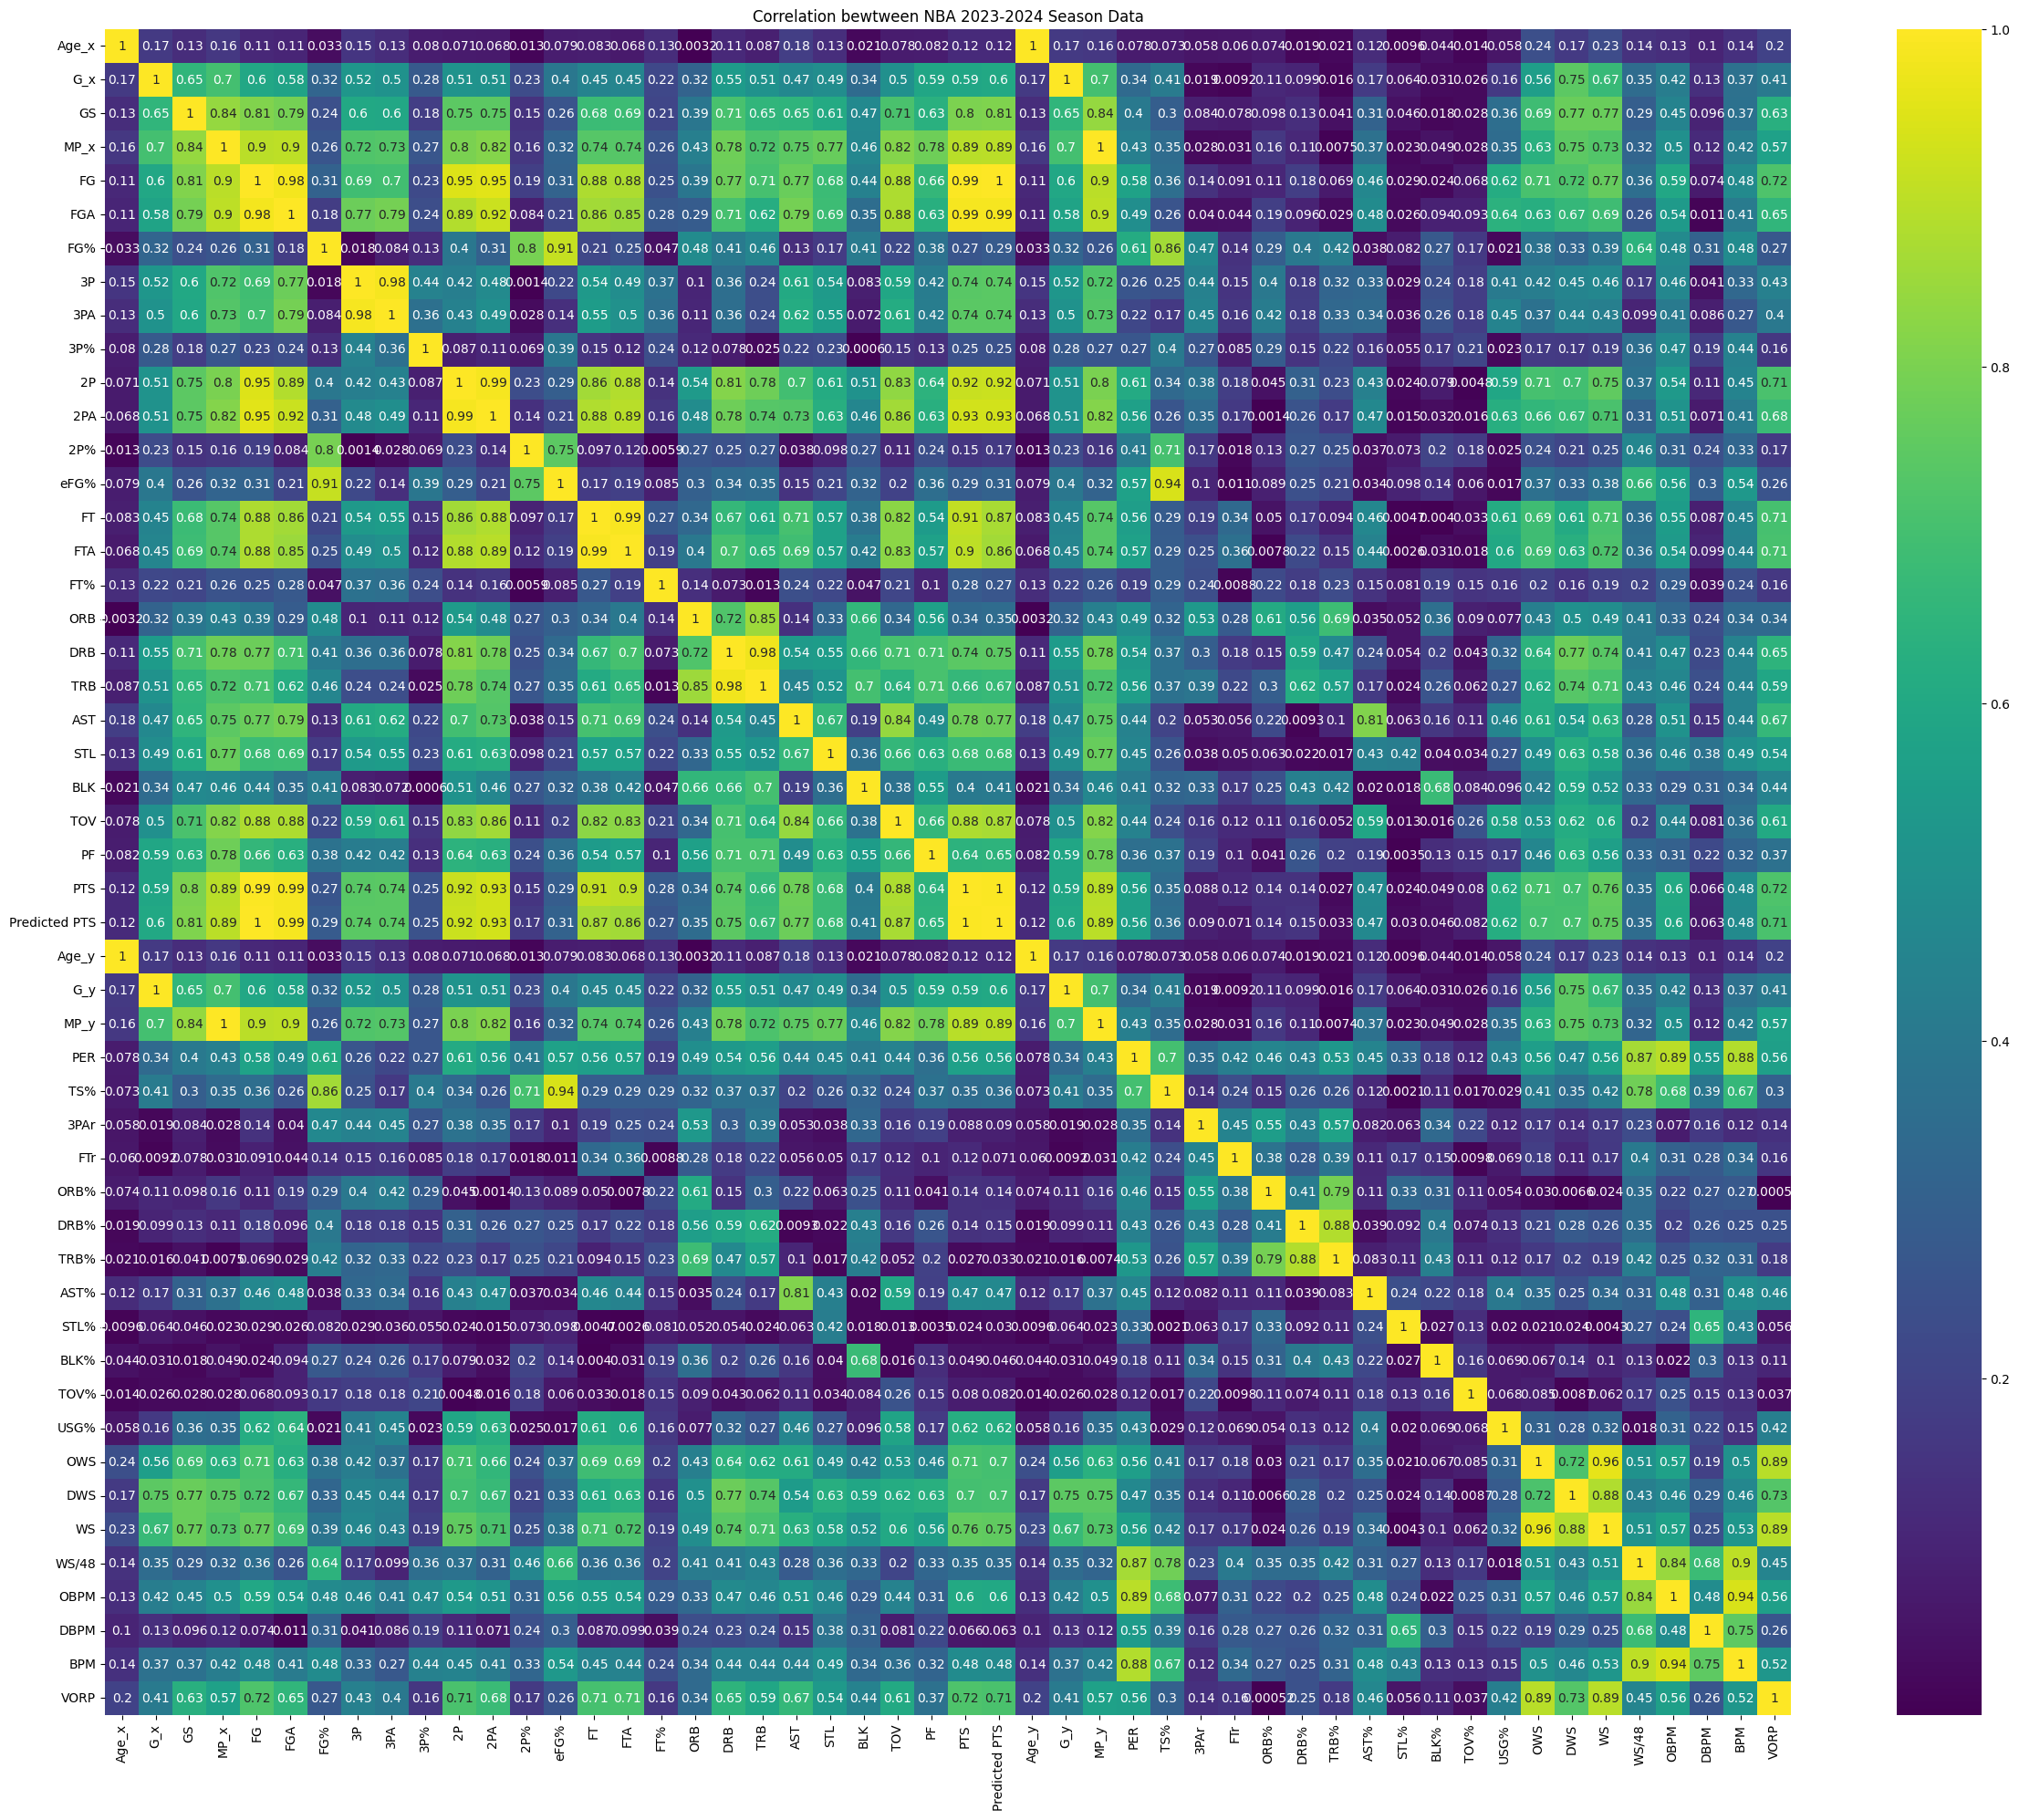

In [274]:
plt.subplots(figsize=(30,24))

sns.heatmap(total_df_numerical.corr().abs(),vmax=1,square=True,annot=True,cmap='viridis')

plt.title("Correlation bewtween NBA 2023-2024 Season Data")

plt.show()

To get three point percentage we will need to predict his three point makes and divide them by his predicted three point attempts!
First we will initiate the model for three point makes,

In [275]:
X2 = total_df[['3PA', 'FGA', 'PTS']]
y2 = total_df['3P']

# Split data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize and fit the model
model2 = LinearRegression()
model2.fit(X2_train, y2_train)

# Predict
y_pred2 = model2.predict(X2)

In [276]:
# Evaluate the model
mse2 = mean_squared_error(y2, y_pred2)
r22 = r2_score(y2, y_pred2)

print(f'Mean Squared Error: {mse2}')
print(f'R-squared: {r22}')
# Display the coefficients
print('Coefficients:', model2.coef_)
print('Intercept:', model2.intercept_)

Mean Squared Error: 0.016479768387583058
R-squared: 0.9786511543833557
Coefficients: [ 0.41371056 -0.10853233  0.073091  ]
Intercept: -0.04169493174992578


Another model with an extremely efficient R-Squared value! 0.97

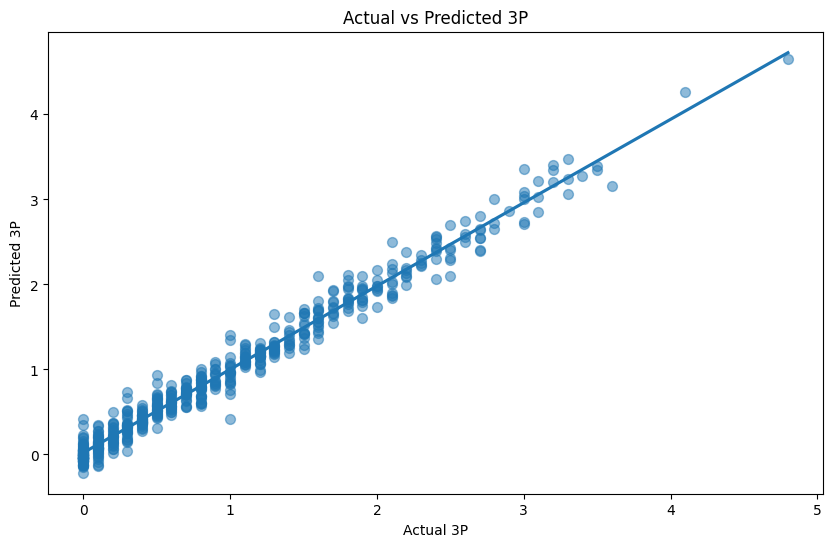

In [277]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.regplot(x=y2, y=y_pred2, ci=None, scatter_kws={"s": 50, "alpha": 0.5})
plt.xlabel('Actual 3P')
plt.ylabel('Predicted 3P')
plt.title('Actual vs Predicted 3P')
plt.show()

In [278]:
predictions2 = y_pred2

# Adding the predictions to the DataFrame
nba_df['Predicted 3P'] = predictions2
#Rounding Values to a decimal points
nba_df['Predicted 3P'] = round(nba_df['Predicted 3P'],ndigits=2)

Now we initate the model for three point attempts!

In [279]:
X3 = total_df[['PTS', 'FGA', '3P']]
y3 = total_df['3PA']

# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Initialize and fit the model
model3 = LinearRegression()
model3.fit(X3_train, y3_train)

# Predict
y_pred3 = model3.predict(X3)

In [280]:
# Evaluate the model
mse3 = mean_squared_error(y3, y_pred3)
r2_3 = r2_score(y3, y_pred3)

print(f'Mean Squared Error: {mse3}')
print(f'R-squared: {r2_3}')
# Display the coefficients
print('Coefficients:', model3.coef_)
print('Intercept:', model3.intercept_)

Mean Squared Error: 0.09009046527816726
R-squared: 0.9820428250293014
Coefficients: [-0.18742569  0.29408217  2.29054886]
Intercept: 0.09959244618351626


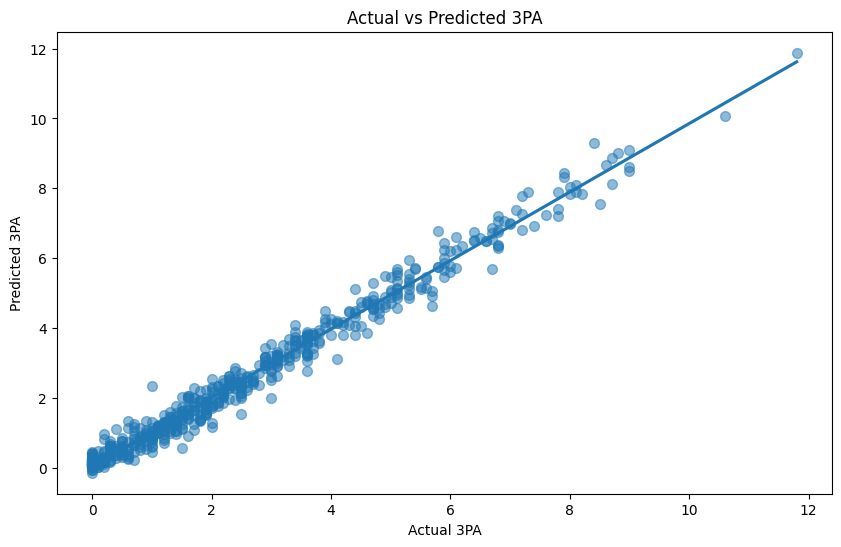

In [281]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.regplot(x=y3, y=y_pred3, ci=None, scatter_kws={"s": 50, "alpha": 0.5})
plt.xlabel('Actual 3PA')
plt.ylabel('Predicted 3PA')
plt.title('Actual vs Predicted 3PA')
plt.show()

In [282]:
predictions3 = y_pred3

# Adding the predictions to the DataFrame
nba_df['Predicted 3PA'] = predictions3
#Rounding Values to a decimal points
nba_df['Predicted 3PA'] = round(nba_df['Predicted 3PA'],ndigits=2)
# Displaying the updated DataFrame
nba_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Predicted PTS,Predicted 3P,Predicted 3PA
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,6.6,1.3,0.6,0.9,1.1,1.9,7.6,8.1,0.37,1.44
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,10.4,3.9,1.1,0.9,2.3,2.2,19.3,18.9,0.07,1.15
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,2.8,1.1,0.6,0.6,0.8,1.5,5.8,6.1,0.89,2.49
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,5.8,2.3,0.7,0.9,1.1,1.5,10.7,11.1,1.80,4.72
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,2.0,2.5,0.8,0.5,0.9,1.7,8.0,8.3,1.52,4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,13.3,2.0,3.3,0.602,...,3.1,1.7,0.7,0.2,0.5,1.5,4.2,4.8,-0.01,0.28
568,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,0.430,...,2.8,10.8,1.3,0.2,4.4,2.0,25.7,22.7,3.41,8.11
569,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,0.538,...,4.3,0.6,0.2,0.4,0.8,1.1,4.6,5.2,0.09,0.58
570,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,0.419,...,2.6,0.9,0.2,0.1,0.4,1.0,1.8,1.3,-0.02,0.17


Now we adjust both columns to his predicted minutes per game for this upcoming season,

In [283]:
total_threes = 178
total_minutes = gt['MP'].values[0] * 82 

threepm = total_threes / total_minutes

# New expected minutes per game
new_minutes_per_game = 24

# Estimate new Threes Per Game (3P)
new_3pg = threepm * new_minutes_per_game

print(f"Estimated Threes Per Game: {new_3pg:.2f}")

total_3A = 453
total_minutes = gt['MP'].values[0] * 82 

ThreeApm = total_3A / total_minutes

# New expected minutes per game
new_minutes_per_game = 24

# Estimate new Three Point Attempts Per Game (3PA)
new_3Apg = ThreeApm * new_minutes_per_game

new_3pg = round(new_3pg, 2)
new_3Apg = round(new_3Apg, 2)

print(f"Estimated Three Point Attempts Per Game: {new_3Apg:.2f}")

Estimated Threes Per Game: 1.85
Estimated Three Point Attempts Per Game: 4.72


In [284]:
nba_df.loc[nba_df['Player'] == 'Gary Trent Jr.', 'Predicted 3P'] = new_3pg
nba_df.loc[nba_df['Player'] == 'Gary Trent Jr.', 'Predicted 3PA'] = new_3Apg

In [285]:
# Create the new column by dividing "Predicted 3P" by "Predicted 3PA" and rounding to 2 decimal points
nba_df['Predicted 3P%'] = (nba_df['Predicted 3P'] / nba_df['Predicted 3PA']).round(2)
nba_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Predicted PTS,Predicted 3P,Predicted 3PA,Predicted 3P%
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,1.3,0.6,0.9,1.1,1.9,7.6,8.1,0.37,1.44,0.26
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,3.9,1.1,0.9,2.3,2.2,19.3,18.9,0.07,1.15,0.06
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,1.1,0.6,0.6,0.8,1.5,5.8,6.1,0.89,2.49,0.36
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,2.3,0.7,0.9,1.1,1.5,10.7,11.1,1.80,4.72,0.38
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,2.5,0.8,0.5,0.9,1.7,8.0,8.3,1.52,4.21,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,13.3,2.0,3.3,0.602,...,1.7,0.7,0.2,0.5,1.5,4.2,4.8,-0.01,0.28,-0.04
568,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,0.430,...,10.8,1.3,0.2,4.4,2.0,25.7,22.7,3.41,8.11,0.42
569,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,0.538,...,0.6,0.2,0.4,0.8,1.1,4.6,5.2,0.09,0.58,0.16
570,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,0.419,...,0.9,0.2,0.1,0.4,1.0,1.8,1.3,-0.02,0.17,-0.12


In [286]:
gt3 = nba_df.loc[nba_df['Player'] == 'Gary Trent Jr.']
gt3

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Predicted PTS,Predicted 3P,Predicted 3PA,Predicted 3P%
506,Gary Trent Jr.,SG,25,TOR,71,41,28.1,5.1,11.9,0.426,...,1.7,1.1,0.1,0.7,1.4,13.7,10.1,1.85,4.72,0.39


# **Data Model for Defensive Win Shares(Linear Regression)**

Finally, we initiate our final model to predict his Defensive Win Shares rating!

In [287]:
# Define the predictor variables and target variable
X4 = total_df[['WS', 'GS', 'DRB']]
y4 = total_df['DWS']

# Split the data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Initialize and fit the model
model4 = LinearRegression()
model4.fit(X4_train, y4_train)

# Predict
y_pred4 = model4.predict(X4)

In [288]:
mse4 = mean_squared_error(y4, y_pred4)
r2_4 = r2_score(y4, y_pred4)

print(f'Mean Squared Error: {mse4}')
print(f'R-squared: {r2_4}')
# Display the coefficients
print('Coefficients:', model4.coef_)
print('Intercept:', model4.intercept_)

Mean Squared Error: 0.20193043645037007
R-squared: 0.8166014932013423
Coefficients: [0.24739586 0.00585449 0.1247882 ]
Intercept: 0.07543456060467202


This model does not run as efficiently as the other three but a 0.81 R-Squared is still a great number to get! If we account for the coefficents, intercept, and MSE we still should get some great predicted values!

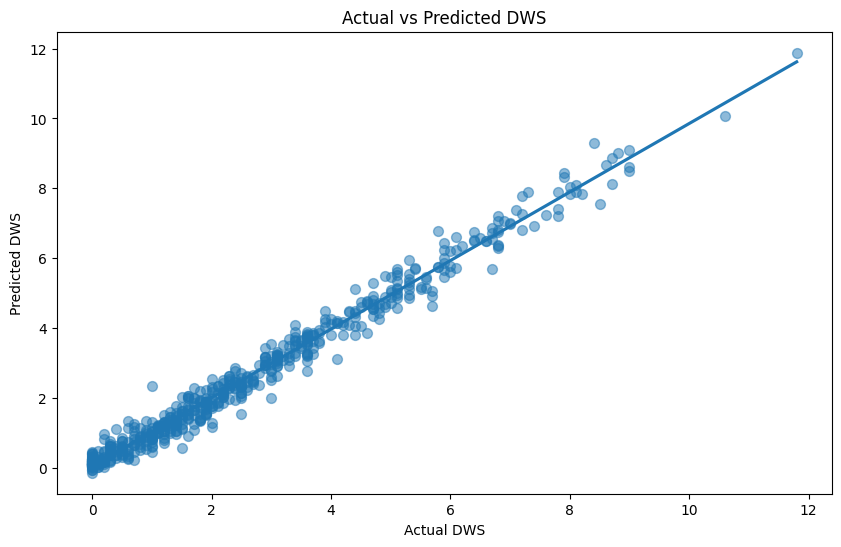

In [289]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y3, y=y_pred3, ci=None, scatter_kws={"s": 50, "alpha": 0.5})
plt.xlabel('Actual DWS')
plt.ylabel('Predicted DWS')
plt.title('Actual vs Predicted DWS')
plt.show()

In [290]:
predictions4 = y_pred4

# Adding the predictions to the DataFrame
nba_df['Predicted DWS'] = predictions3
#Rounding Values to a decimal points
nba_df['Predicted DWS'] = round(nba_df['Predicted 3PA'],ndigits=2)
# Displaying the updated DataFrame
nba_df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Predicted PTS,Predicted 3P,Predicted 3PA,Predicted 3P%,Predicted DWS
0,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,0.501,...,0.6,0.9,1.1,1.9,7.6,8.1,0.37,1.44,0.26,1.44
1,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,0.521,...,1.1,0.9,2.3,2.2,19.3,18.9,0.07,1.15,0.06,1.15
2,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,0.411,...,0.6,0.6,0.8,1.5,5.8,6.1,0.89,2.49,0.36,2.49
3,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,0.435,...,0.7,0.9,1.1,1.5,10.7,11.1,1.80,4.72,0.38,4.72
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,0.439,...,0.8,0.5,0.9,1.7,8.0,8.3,1.52,4.21,0.36,4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Thaddeus Young,PF,35,TOT,33,6,13.3,2.0,3.3,0.602,...,0.7,0.2,0.5,1.5,4.2,4.8,-0.01,0.28,-0.04,0.28
568,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,0.430,...,1.3,0.2,4.4,2.0,25.7,22.7,3.41,8.11,0.42,8.11
569,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,0.538,...,0.2,0.4,0.8,1.1,4.6,5.2,0.09,0.58,0.16,0.58
570,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,0.419,...,0.2,0.1,0.4,1.0,1.8,1.3,-0.02,0.17,-0.12,0.17


In [291]:
gt4 = nba_df.loc[nba_df['Player'] == 'Gary Trent Jr.']
gt4

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Predicted PTS,Predicted 3P,Predicted 3PA,Predicted 3P%,Predicted DWS
506,Gary Trent Jr.,SG,25,TOR,71,41,28.1,5.1,11.9,0.426,...,1.1,0.1,0.7,1.4,13.7,10.1,1.85,4.72,0.39,4.72


Above, you can see his final predicted stat line for this upcoming season. Even in a potentially diminished role, he is still putting up great numbers. This collection of stats still call for a 10-20 million dollar salary and that will be visualized below.

In [292]:
conn = sqlite3.connect('nba_database.db')
nba_df.to_sql('nba_stats', conn, if_exists='replace')

572

In [293]:
conn = sqlite3.connect('nba_database.db')
query = '''
SELECT "Player" , "Predicted DWS", "Predicted 3P%"
FROM nba_stats
WHERE Pos = 'SG' and G > 25 and MP >= 15;
'''
dws3_df = pd.read_sql_query(query, conn)

conn.close()

print(dws3_df)

                      Player  Predicted DWS  Predicted 3P%
0               Ochai Agbaji           2.49           0.36
1   Nickeil Alexander-Walker           4.21           0.36
2              Grayson Allen           6.43           0.37
3               Desmond Bane           8.66           0.37
4             Scottie Barnes           4.88           0.36
..                       ...            ...            ...
58          Lonnie Walker IV           4.90           0.34
59             Cason Wallace           3.16           0.34
60             Derrick White           6.82           0.39
61             Aaron Wiggins           2.05           0.29
62        Vince Williams Jr.           3.81           0.41

[63 rows x 3 columns]


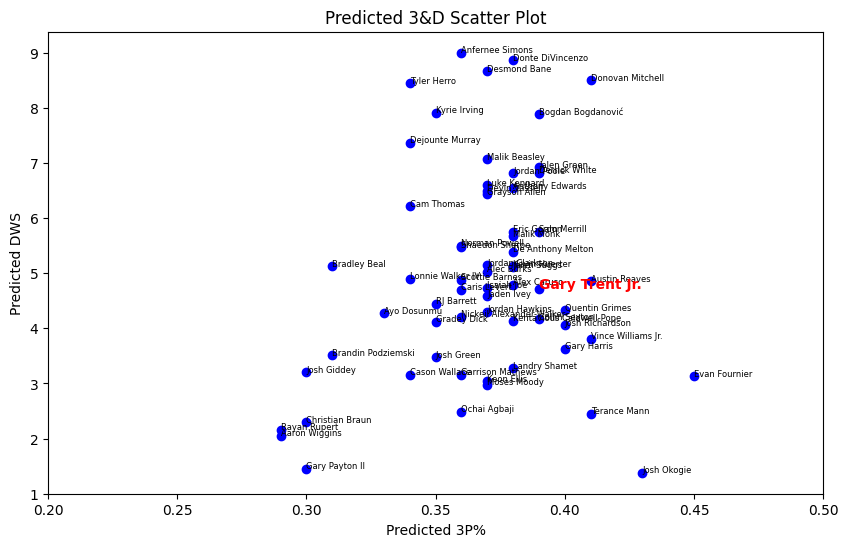

In [294]:
plt.figure(figsize=(10, 6))
plt.scatter(dws3_df['Predicted 3P%'], dws3_df['Predicted DWS'], color='blue')

# Annotate each point with the player's name
for i, row in dws3_df.iterrows():
    if row['Player'] == 'Gary Trent Jr.':
        plt.annotate(row['Player'], (row['Predicted 3P%'], row['Predicted DWS']), fontsize=10, fontweight='bold', color='red')
    else:
        plt.annotate(row['Player'], (row['Predicted 3P%'], row['Predicted DWS']), fontsize=6)


# Set y-axis limits
plt.xlim(0.20, 0.50)

plt.xlabel('Predicted 3P%')
plt.ylabel('Predicted DWS')
plt.title('Predicted 3&D Scatter Plot')
plt.show()

## Scatter Plot Analysis: Gary Trent Jr.'s Value

The scatter plot visualization illustrates the salaries of NBA shooting guards. Notably, Gary Trent Jr. emerges as an outlier, showcasing a performance level comparable to his peers who earn over $10 million annually. Despite this, his current salary is a mere $2.6 million, highlighting a significant undervaluation.

This data underscores the Milwaukee Bucks' strategic advantage in acquiring a high-performing player at a fraction of the cost, further cementing Gary Trent Jr.'s status as a steal in the NBA market.


In [295]:
salary_df = pd.read_excel('salaryData.xlsx')
salary_df.head()

,Rk,Player,Tm,2024-25,2025-26,2026-27,2027-28,2028-29,2029-30,Guaranteed,-9999
0,1.0,Stephen Curry,GSW,55761216,59606817.0,NaN,NaN,NaN,NaN,115368033.0,curryst01
1,2.0,Nikola Jokić,DEN,51415938,55224526.0,59033114.0,62841702.0,NaN,NaN,165673578.0,jokicni01
2,3.0,Joel Embiid,PHI,51415938,55224526.0,NaN,NaN,NaN,NaN,106640464.0,embiijo01
3,4.0,Kevin Durant,PHO,51179021,54708609.0,NaN,NaN,NaN,NaN,105887630.0,duranke01
4,5.0,Bradley Beal,PHO,50203930,53666270.0,57128610.0,NaN,NaN,NaN,103870200.0,bealbr01


In [296]:
conn = sqlite3.connect('nba_database.db')
salary_df.to_sql('salaryData', conn, if_exists='replace')

428

In [297]:
salary_df = salary_df.fillna(0)
salary_df = salary_df.drop(columns=["Rk"])
salary_df = salary_df.applymap(lambda x: f"{x:,}" if isinstance(x, (int, float)) else x)
salary_df

C:\Users\sloan\AppData\Local\Temp\ipykernel_10828\2810664579.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  salary_df = salary_df.applymap(lambda x: f"{x:,}" if isinstance(x, (int, float)) else x)


,Player,Tm,2024-25,2025-26,2026-27,2027-28,2028-29,2029-30,Guaranteed,-9999
0,Stephen Curry,GSW,"55,761,216","59,606,817.0",0.0,0.0,0.0,0.0,"115,368,033.0",curryst01
1,Nikola Jokić,DEN,"51,415,938","55,224,526.0","59,033,114.0","62,841,702.0",0.0,0.0,"165,673,578.0",jokicni01
2,Joel Embiid,PHI,"51,415,938","55,224,526.0",0.0,0.0,0.0,0.0,"106,640,464.0",embiijo01
3,Kevin Durant,PHO,"51,179,021","54,708,609.0",0.0,0.0,0.0,0.0,"105,887,630.0",duranke01
4,Bradley Beal,PHO,"50,203,930","53,666,270.0","57,128,610.0",0.0,0.0,0.0,"103,870,200.0",bealbr01
...,...,...,...,...,...,...,...,...,...,...
423,Juwan Morgan,IND,"576,229",0.0,0.0,0.0,0.0,0.0,"576,229.0",morgaju01
424,Malik Fitts,IND,"555,216",0.0,0.0,0.0,0.0,0.0,"555,216.0",fittsma01
425,Jordan Goodwin,BRK,"325,590",0.0,0.0,0.0,0.0,0.0,"325,590.0",goodwjo01
426,Didi Louzada,POR,"268,032","268,032.0","268,032.0","268,032.0","268,032.0",0.0,"1,340,160.0",louzama01


In [298]:
conn = sqlite3.connect('nba_database.db')

# SQL query
query = 'SELECT Player, "2024-25" FROM salaryData;'

# Fetch data into a dataframe
salary_df2 = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

salary_df2

,Player,2024-25
0,Stephen Curry,55761216
1,Nikola Jokić,51415938
2,Joel Embiid,51415938
3,Kevin Durant,51179021
4,Bradley Beal,50203930
...,...,...
423,Juwan Morgan,576229
424,Malik Fitts,555216
425,Jordan Goodwin,325590
426,Didi Louzada,268032


In [300]:
# Merging dataframes on the 'Player' column
nba_df = pd.merge(salary_df2, nba_df, on='Player')
nba_df

,Player,2024-25,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,Predicted PTS,Predicted 3P,Predicted 3PA,Predicted 3P%,Predicted DWS
0,Stephen Curry,55761216,PG,35,GSW,74,74,32.7,8.8,19.5,...,0.7,0.4,2.8,1.6,26.4,26.2,4.65,11.88,0.39,11.88
1,Joel Embiid,51415938,C,29,PHI,39,39,33.6,11.5,21.8,...,1.2,1.7,3.8,2.9,34.7,30.5,1.62,3.21,0.50,3.21
2,Nikola Jokić,51415938,C,28,DEN,79,79,34.6,10.4,17.9,...,1.4,0.9,3.0,2.5,26.4,27.3,1.14,2.94,0.39,2.94
3,Kevin Durant,51179021,PF,35,PHO,75,75,37.2,10.0,19.1,...,0.9,1.2,3.3,1.8,27.1,27.1,2.10,5.68,0.37,5.68
4,Bradley Beal,50203930,SG,30,PHO,53,53,33.3,7.1,13.9,...,1.0,0.5,2.5,2.4,18.2,19.3,1.60,5.13,0.31,5.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,Ricky Council IV,1891857,SG,22,PHI,32,0,9.0,1.7,3.5,...,0.3,0.0,0.2,0.5,5.4,4.5,0.39,1.03,0.38,1.03
375,Leonard Miller,1891857,SF,20,MIN,17,0,3.1,0.8,1.2,...,0.1,0.1,0.1,0.3,1.7,2.1,0.08,0.36,0.22,0.36
376,Ryan Rollins,600000,PG,21,TOT,13,0,6.0,1.1,2.1,...,0.8,0.2,0.6,0.6,3.4,2.8,0.10,0.54,0.19,0.54
377,Jordan Goodwin,325590,PG,25,TOT,57,12,18.5,2.5,6.7,...,0.8,0.3,1.0,1.3,6.5,6.6,0.74,2.46,0.30,2.46


In [301]:
conn = sqlite3.connect('nba_database.db')
nba_df.to_sql('nba_stats', conn, if_exists='replace')

379

In [302]:
conn = sqlite3.connect('nba_database.db')
query = '''
SELECT "Player" , "2024-25"
FROM nba_stats
WHERE Pos = 'SG' and G > 25 and MP >= 15;
'''
sal_df = pd.read_sql_query(query, conn)

conn.close()

print(sal_df)

                      Player   2024-25
0               Bradley Beal  50203930
1            Anthony Edwards  42176400
2               Kyrie Irving  41000000
3           Donovan Mitchell  35410310
4               Desmond Bane  34005250
5               Jordan Poole  29651786
6              Devin Vassell  29347826
7                Tyler Herro  29000000
8            Anfernee Simons  25892857
9                 RJ Barrett  25794643
10           Dejounte Murray  25499599
11  Kentavious Caldwell-Pope  22757000
12             Derrick White  20071429
13             Norman Powell  19241379
14             Collin Sexton  18350000
15                Malik Monk  17405203
16         Bogdan Bogdanović  17260000
17             Kevin Huerter  16830357
18              Caris LeVert  16615384
19             Grayson Allen  15625000
20              Luke Kennard  14763636
21           Jordan Clarkson  14092577
22                Isaiah Joe  12991650
23             Austin Reaves  12976362
24         De'Anthony Mel

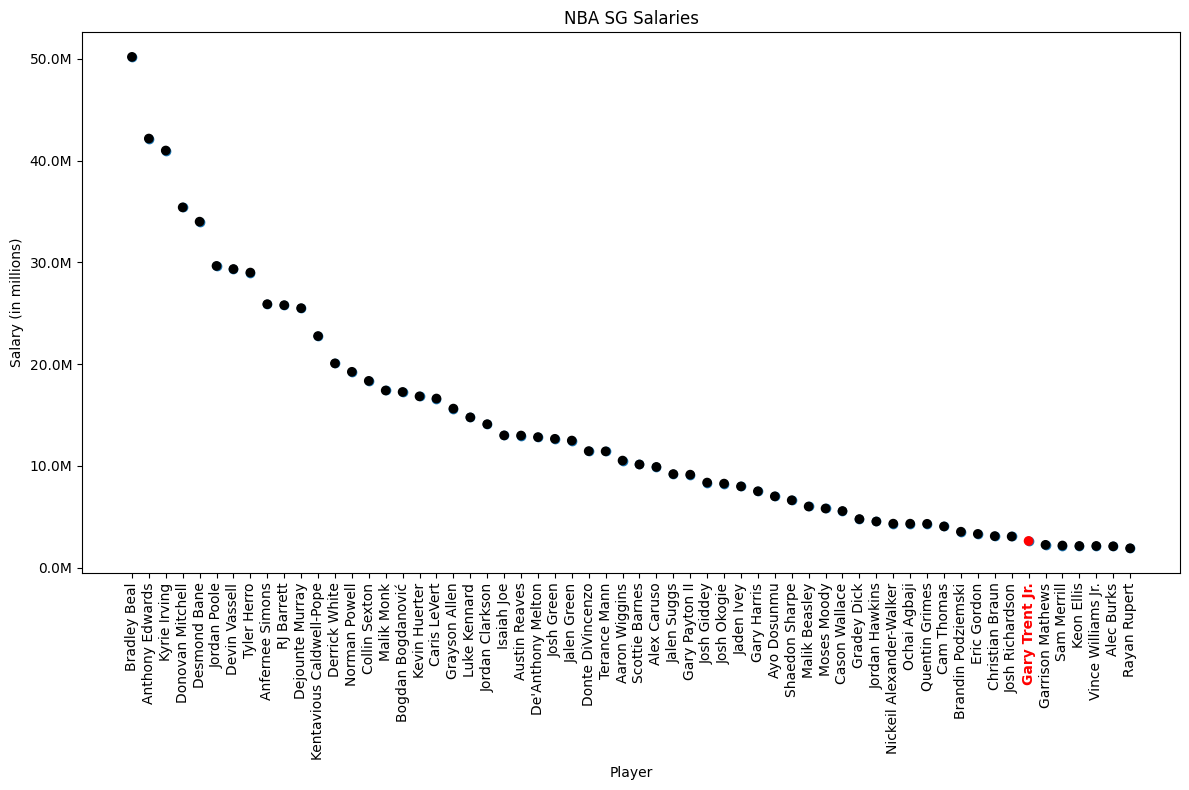

In [320]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

# Assuming 'sal_df' has 'Player' and 'Salary' columns
plt.figure(figsize=(12, 8))

# Creating the scatter plot
plt.scatter(sal_df['Player'], sal_df['2024-25'])

# Highlighting "Gary Trent Jr." in red and bold
highlight = 'Gary Trent Jr.'
players = sal_df['Player']
colors = ['red' if player == highlight else 'black' for player in players]

plt.scatter(sal_df['Player'], sal_df['2024-25'], color=colors)
plt.xticks(rotation=90)

# Making "Gary Trent Jr." bold on the x-axis
plt.gca().get_xticklabels()[players.tolist().index(highlight)].set_color('red')
plt.gca().get_xticklabels()[players.tolist().index(highlight)].set_fontweight('bold')

# Setting the y-axis to show millions
plt.gca().yaxis.set_major_formatter(formatter)

# Labels and title
plt.xlabel('Player')
plt.ylabel('Salary (in millions)')
plt.title('NBA SG Salaries')

plt.tight_layout()
plt.show()


## Scatter Plot Analysis: Gary Trent Jr.'s Value

The scatter plot visualization illustrates the salaries of NBA shooting guards. Gary Trent Jr. emerges as a huge outlier, showcasing a performance level comparable to his peers who earn over 10 million annually, as shown in the Predicted 3&D scatter plot above the salary data. Despite this, the current salary Milwaukee signed him for is a mere 2.6 million, highlighting a significant undervaluation by NBA GMs.

This data underscores the Milwaukee Bucks' strategic advantage in acquiring a high-performing player at a fraction of the cost, further cementing Gary Trent Jr.'s status as a steal in the NBA market.

## Conclusion

In this project, I conducted an in-depth analysis of Gary Trent Jr.'s value as a 3&D player for the Milwaukee Bucks. Using data from the 2023-24 NBA season, I compared his defensive performance metrics and three-point percentage against other shooting guards in the league. Additionally, I predicted his future performance to demonstrate his consistent value for his new team.

Key highlights of the analysis include:
- Gary Trent Jr. excels as a defensive specialist and a three-point shooter, comparable to higher-paid shooting guards.
- Despite his comparable performance, his salary remains significantly lower, indicating a potential undervaluation in the market.
- Through further visualization and correlation research, I predicted key stats for the upcoming season: points, defensive win shares, three-point made, and three-point attempted.

To support these predictions, I developed four linear regression models with impressive r-squared values of 99%, 97%, and 98%, demonstrating strong predictive accuracy.

Overall, this project underscores the strategic and cost-effective decision by the Milwaukee Bucks to sign Gary Trent Jr., a high-performing player who delivers value far exceeding his current salary.